In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score # AUC score
from sklearn.metrics import average_precision_score # AUPR score
from sklearn.metrics import precision_recall_fscore_support # precision, recall
from imblearn.metrics import sensitivity_specificity_support # sensitivity, specificity
from sklearn.metrics import roc_curve # to draw auc curve
from sklearn.metrics import precision_recall_curve # to draw aupr curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
#2017.4.24. 
path = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/2_similarity_based-PREDICT/"
tn = pd.read_table(path + "4_5_tn_local_norm_1_1_descriptor.tsv")
no_tn = pd.read_table(path + "4_5_2_noTn_only_local_norm_descriptor.tsv")
# 2017.4.24. pos : TN : noise = 1:0.5:0.5
#tn = pd.read_table(path + "4_6_tn_local_norm_1_0_5_descriptor.tsv")
#no_tn = pd.read_table(path + "4_6_2_noTn_only_local_norm_descriptor.tsv")
# 2017.4.24. pos : TN : noise = 1:0.8:0.2
#tn = pd.read_table(path + "4_7_tn_local_norm_1_0_8_descriptor.tsv")
#no_tn = pd.read_table(path + "4_7_2_noTn_only_local_norm_descriptor.tsv")

In [4]:
#2017.4.24. independent dataset
path = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/2_similarity_based-PREDICT/"
indep = pd.read_table(path+"3_2_indep_descriptor.tsv")
indep_x = indep.values[:, 3:].astype(float)
indep_y = indep.values[:,2].astype(int)

In [61]:
# undersampler
rus = RandomUnderSampler()
oss = OneSidedSelection()
nm = NearMiss()

In [62]:
tn_neg_count = len(tn[tn.association == 0])
print tn_neg_count
tn.head(1)

1012


,drug_id,disease_id,association,drStr_diGe,drStr_diPhe,drPhe_diGe,drPhe_diPhe
0,DB00114,239350,1,0.80403,0.80403,0.962981,0.962981


In [63]:
no_tn_count = len(no_tn)
print no_tn_count
no_tn.head(1)

97151


,drug_id,disease_id,association,drStr_diGe,drStr_diPhe,drPhe_diGe,drPhe_diPhe
0,DB00114,102300,0,0.983534,0.429415,0.983534,0.943927


start : 2017-04-24 22:37:40
6 : 120------------------------------------


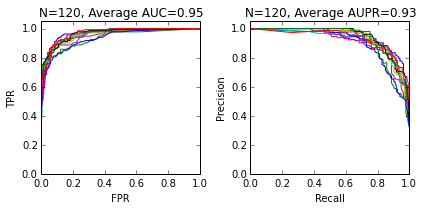

6 : 300------------------------------------


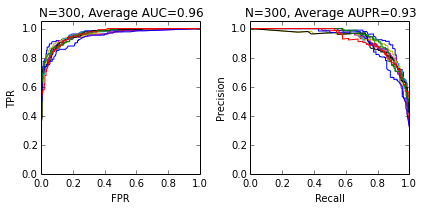

6 : 500------------------------------------


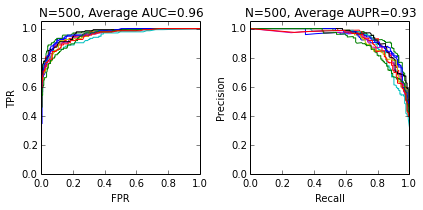

6 : 800------------------------------------


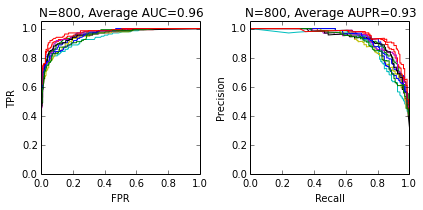

6 : 1200------------------------------------


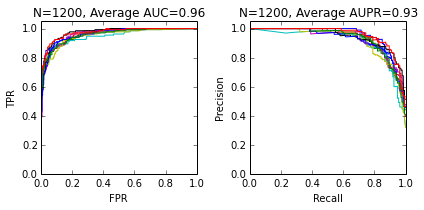

end : 2017-04-24 22:41:06


In [42]:
#파일 덮어씀.. 결과 보고 싶으면 다시 돌려야함. try6의 N=500이 가장 좋았음. --> 이것만 돌린다.(근데 덮은 결과에서는 1200이 더 좋게나옴.)
# pick random noise by 1:1 (P:TN:Noise = 1:1:1 --> P:N = 1:2)
#indices_1 = list()
#li_noise1 = list()
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_training_1by1.txt", 'w') as fd :   
    
    '''#for i in range(10):
    for idx, i in zip(indices_1, range(10)):
        fd.write("<{} : independent>\r\n".format(i))
        print "{} : independent\n".format(i) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        #idx = random.sample(xrange(0, no_tn_count), tn_neg_count) # no_tn_count의 index에서 tn_count의 갯수만큼 랜덤으로 인덱스를 뽑느다.
        #indices_1.append(idx)
        filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
        noise_tn = pd.concat([tn,filtered])
        
        x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
        y_whole_data = noise_tn["association"].values
        
        param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        for user_estimator in [120,300,500,800,1200]:
            folds_results, draw_results = Random_Forest_K_fold_graph(x_whole_data, y_whole_data, k, user_estimator)
            avg_result = average_result(folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
            param_results[user_estimator].append(avg_result) # parameter 별로 indepedent 결과 저장한다.
            draw_total[user_estimator].append(draw_results)

        final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        for user_estimator in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
            indep_results = independent_results(param_results[user_estimator])
            final_param_results[user_estimator] = final_results(indep_results)
            draw_plot(draw_total[user_estimator], final_param_results[user_estimator], i, user_estimator)
            write_output(fd, final_param_results[user_estimator], i, user_estimator)'''
print 'end : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-04-24 22:52:02
6 : 1200------------------------------------


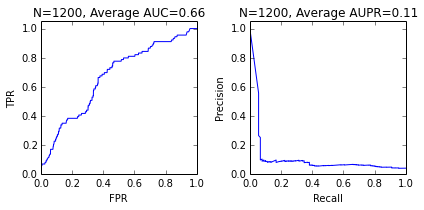

2017-04-24 22:52:10


In [47]:
# pick random noise by 1:1 independent (P:TN:Noise = 1:1:1 --> P:N = 1:2)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_323_RF(sim)_tn+noise_indep_1by1.txt", 'w') as fd :
    user_estimator = 1200
    idx = indices_1[6]
    i=6
    fd.write("<{} : independent>\r\n".format(i))
    filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
    noise_tn = pd.concat([tn,filtered])

    x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
    y_whole_data = noise_tn["association"].values

    folds_results, draw_results, fp_results = Random_Forest_independent_graph(x_whole_data, y_whole_data, indep_x, indep_y, user_estimator)
    draw_plot([draw_results], folds_results, i, user_estimator)
    write_output(fd, folds_results, i, user_estimator)
#li_noise1.append(predicted_results(fp_results))
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

start : 2017-04-24 22:56:21
0 : independent
2017-04-24 22:56:21
0 : 120------------------------------------


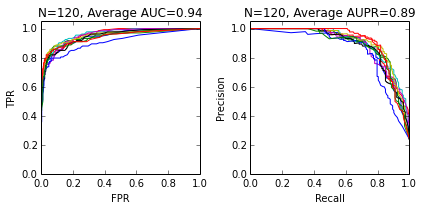

0 : 300------------------------------------


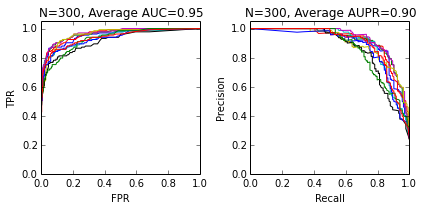

0 : 500------------------------------------


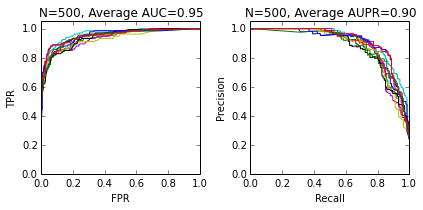

0 : 800------------------------------------


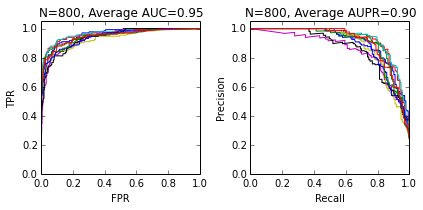

0 : 1200------------------------------------


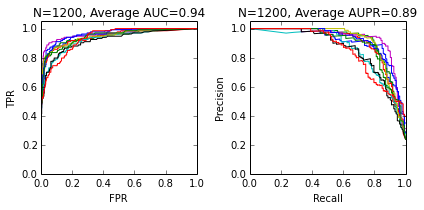

1 : independent
2017-04-24 22:59:48
1 : 120------------------------------------


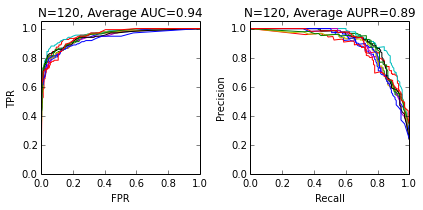

1 : 300------------------------------------


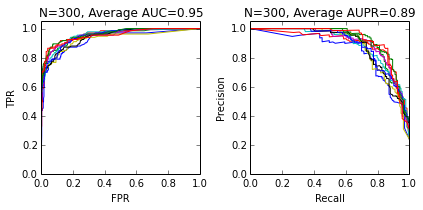

1 : 500------------------------------------


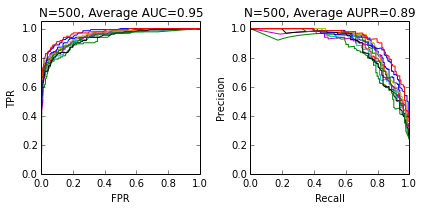

1 : 800------------------------------------


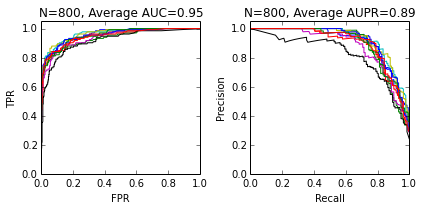

1 : 1200------------------------------------


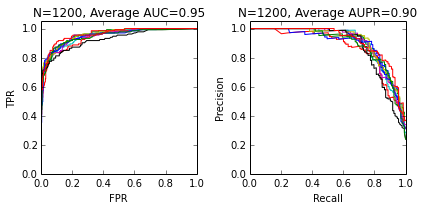

2 : independent
2017-04-24 23:03:10
2 : 120------------------------------------


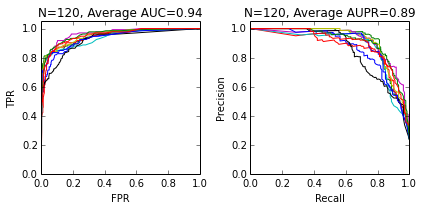

2 : 300------------------------------------


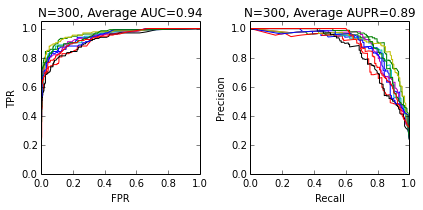

2 : 500------------------------------------


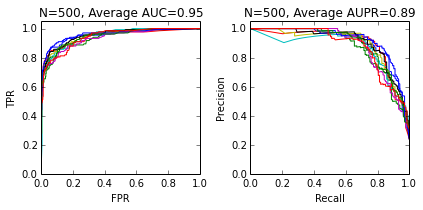

2 : 800------------------------------------


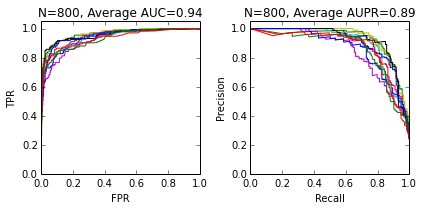

2 : 1200------------------------------------


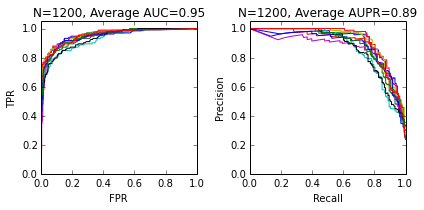

3 : independent
2017-04-24 23:06:32
3 : 120------------------------------------


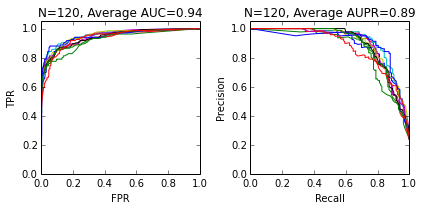

3 : 300------------------------------------


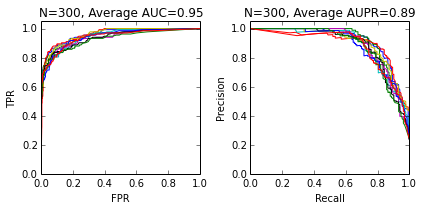

3 : 500------------------------------------


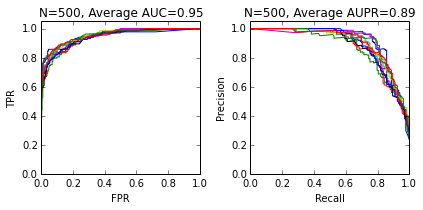

3 : 800------------------------------------


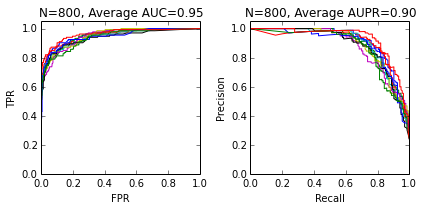

3 : 1200------------------------------------


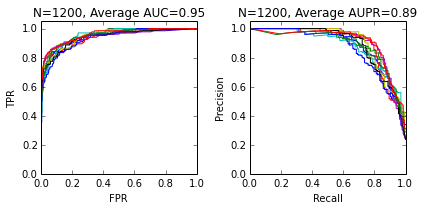

4 : independent
2017-04-24 23:10:00
4 : 120------------------------------------


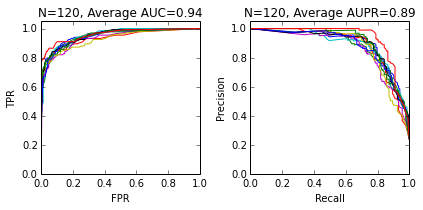

4 : 300------------------------------------


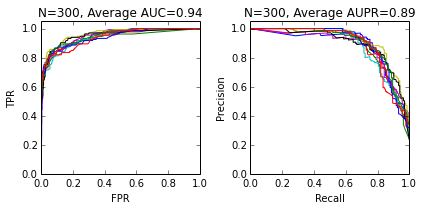

4 : 500------------------------------------


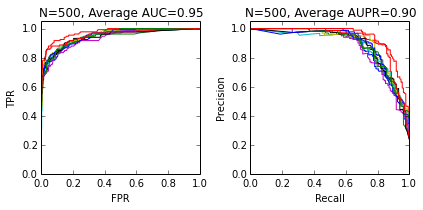

4 : 800------------------------------------


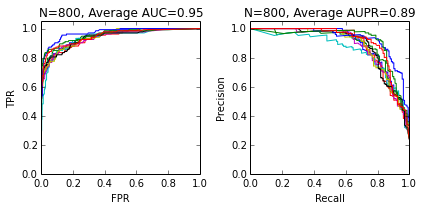

4 : 1200------------------------------------


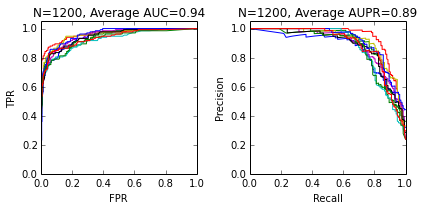

5 : independent
2017-04-24 23:13:26
5 : 120------------------------------------


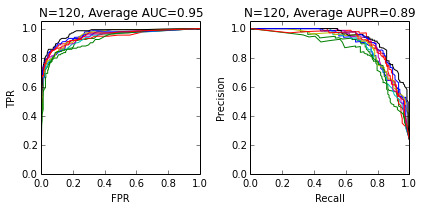

5 : 300------------------------------------


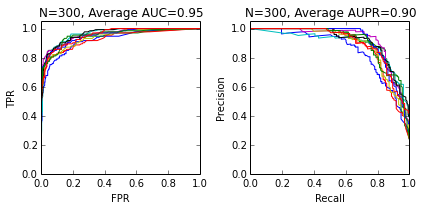

5 : 500------------------------------------


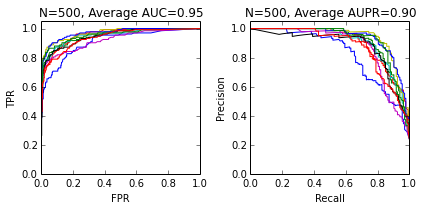

5 : 800------------------------------------


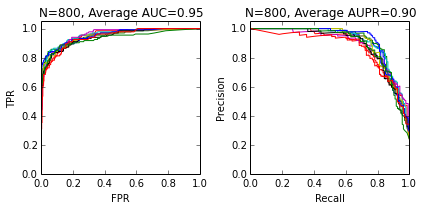

5 : 1200------------------------------------


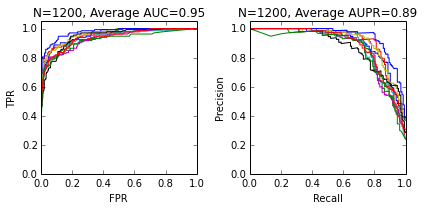

6 : independent
2017-04-24 23:16:53
6 : 120------------------------------------


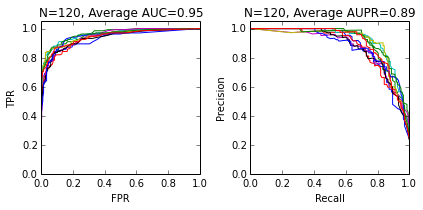

6 : 300------------------------------------


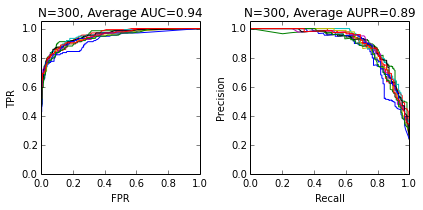

6 : 500------------------------------------


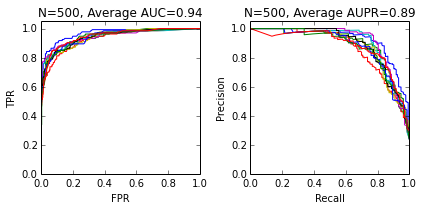

6 : 800------------------------------------


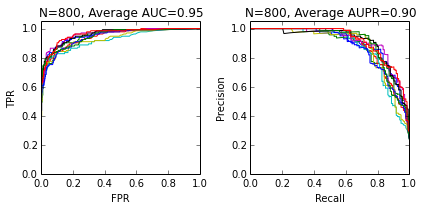

6 : 1200------------------------------------


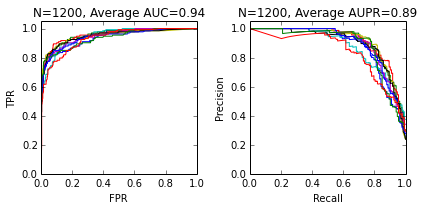

7 : independent
2017-04-24 23:20:20
7 : 120------------------------------------


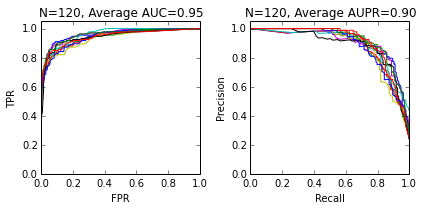

7 : 300------------------------------------


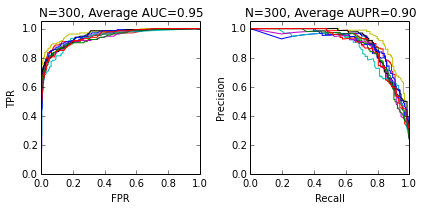

7 : 500------------------------------------


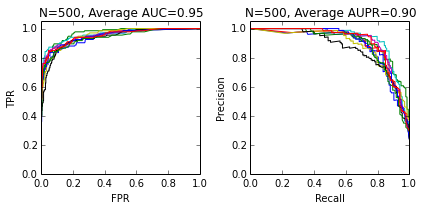

7 : 800------------------------------------


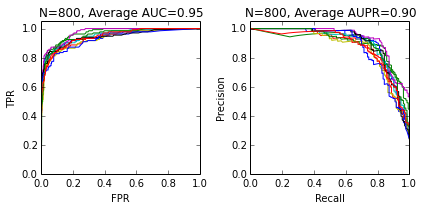

7 : 1200------------------------------------


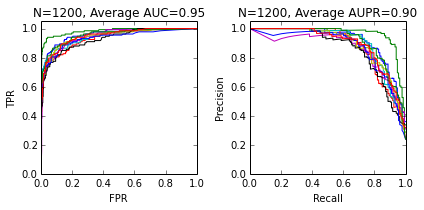

8 : independent
2017-04-24 23:23:49
8 : 120------------------------------------


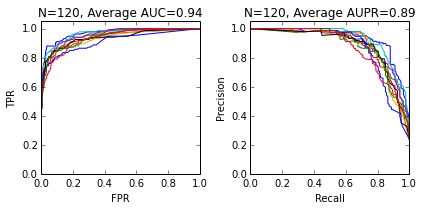

8 : 300------------------------------------


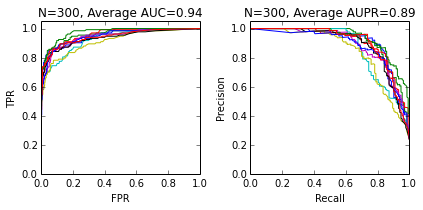

8 : 500------------------------------------


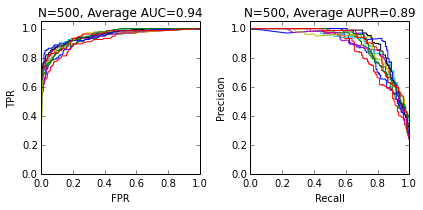

8 : 800------------------------------------


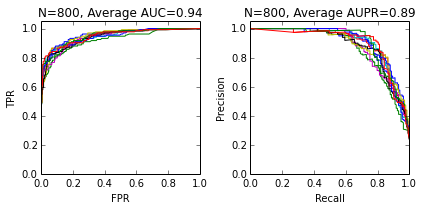

8 : 1200------------------------------------


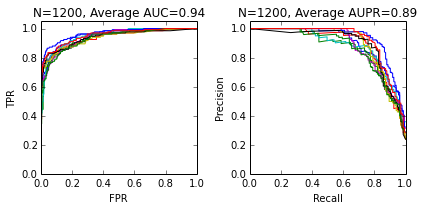

9 : independent
2017-04-24 23:27:19
9 : 120------------------------------------


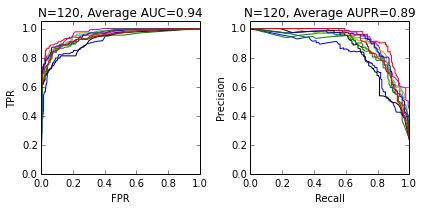

9 : 300------------------------------------


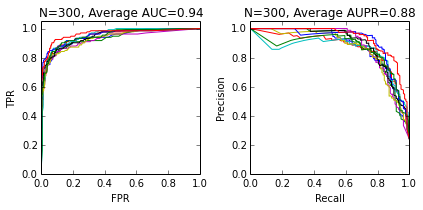

9 : 500------------------------------------


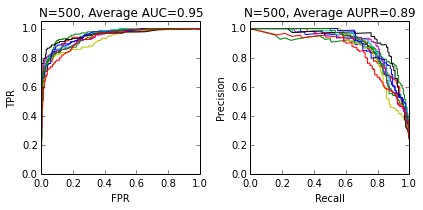

9 : 800------------------------------------


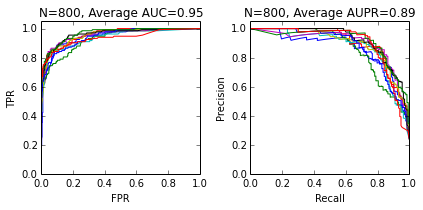

9 : 1200------------------------------------


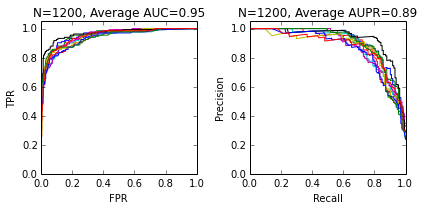

end : 2017-04-24 23:30:47


In [48]:
# pick random noise by 1:1 (P:TN:Noise = 1:1:2 --> P:N = 1:3)
indices_2 = list()
#li_noise1 = list()
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_training_1by2.txt", 'w') as fd :   
    
    for i in range(10):
    #for idx, i in zip(indices_2, range(10)):
        fd.write("<{} : independent>\r\n".format(i))
        print "{} : independent\n".format(i) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        idx = random.sample(xrange(0, no_tn_count), 2*tn_neg_count) # no_tn_count의 index에서 tn_count의 두배만큼 랜덤으로 인덱스를 뽑느다.
        indices_2.append(idx)
        filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
        noise_tn = pd.concat([tn,filtered])
        
        x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
        y_whole_data = noise_tn["association"].values
        
        param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        for user_estimator in [120,300,500,800,1200]:
            folds_results, draw_results = Random_Forest_K_fold_graph(x_whole_data, y_whole_data, k, user_estimator)
            avg_result = average_result(folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
            param_results[user_estimator].append(avg_result) # parameter 별로 indepedent 결과 저장한다.
            draw_total[user_estimator].append(draw_results)

        final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        for user_estimator in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
            indep_results = independent_results(param_results[user_estimator])
            final_param_results[user_estimator] = final_results(indep_results)
            draw_plot(draw_total[user_estimator], final_param_results[user_estimator], i, user_estimator)
            write_output(fd, final_param_results[user_estimator], i, user_estimator)
print 'end : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-04-24 23:33:55
0 : 800------------------------------------


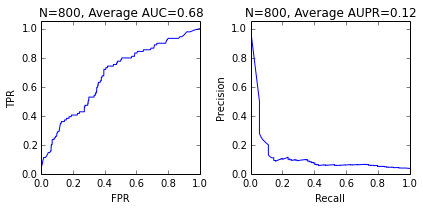

2017-04-24 23:34:01


In [49]:
# pick random noise by 1:2 (P:TN:Noise = 1:1:2 --> P:N = 1:3)
#indices_2 = list()
#li_noise1 = list()
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_indep_1by2.txt", 'w') as fd :
    user_estimator = 800
    i= 0
    idx = indices_2[i]
    fd.write("<{} : independent>\r\n".format(i))
    filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
    noise_tn = pd.concat([tn,filtered])

    x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
    y_whole_data = noise_tn["association"].values

    folds_results, draw_results, fp_results = Random_Forest_independent_graph(x_whole_data, y_whole_data, indep_x, indep_y, user_estimator)
    draw_plot([draw_results], folds_results, i, user_estimator)
    write_output(fd, folds_results, i, user_estimator)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

start : 2017-04-24 23:41:58
0 : independent
2017-04-24 23:41:58
0 : 120------------------------------------


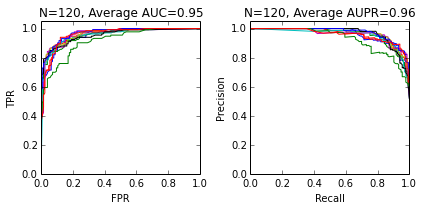

0 : 300------------------------------------


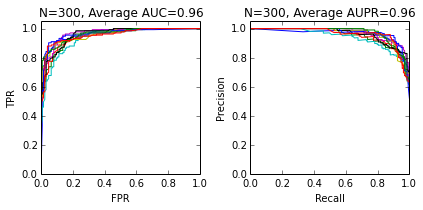

0 : 500------------------------------------


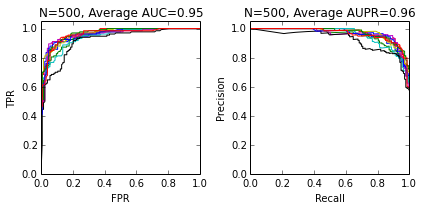

0 : 800------------------------------------


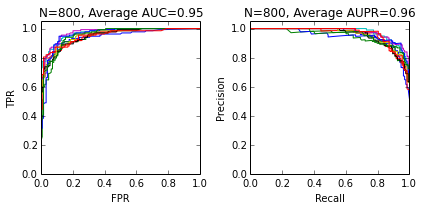

0 : 1200------------------------------------


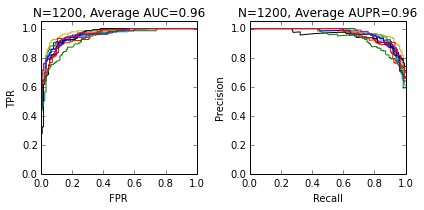

1 : independent
2017-04-24 23:45:19
1 : 120------------------------------------


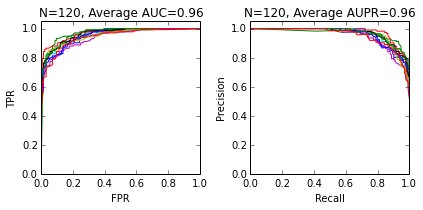

1 : 300------------------------------------


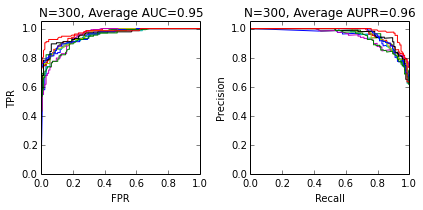

1 : 500------------------------------------


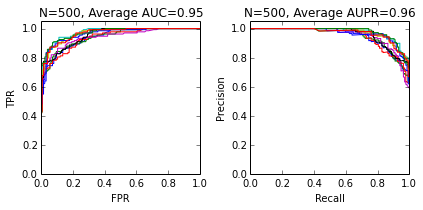

1 : 800------------------------------------


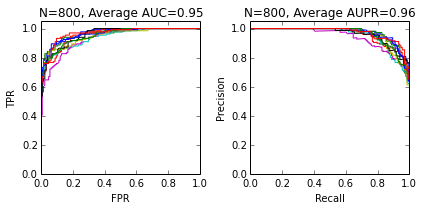

1 : 1200------------------------------------


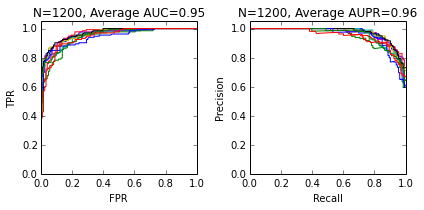

2 : independent
2017-04-24 23:48:37
2 : 120------------------------------------


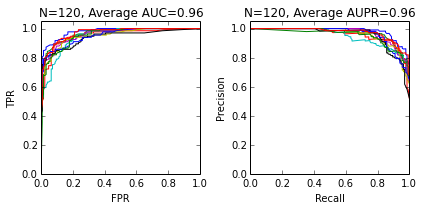

2 : 300------------------------------------


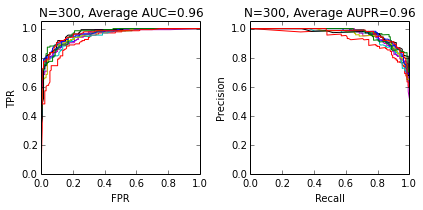

2 : 500------------------------------------


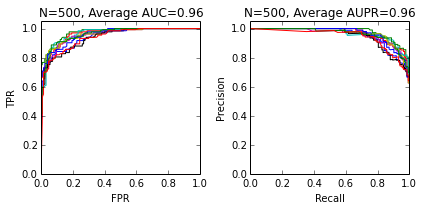

2 : 800------------------------------------


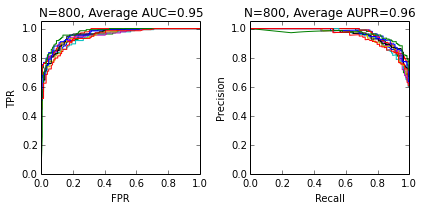

2 : 1200------------------------------------


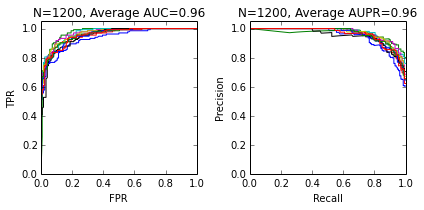

3 : independent
2017-04-24 23:51:57
3 : 120------------------------------------


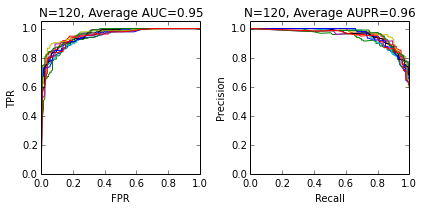

3 : 300------------------------------------


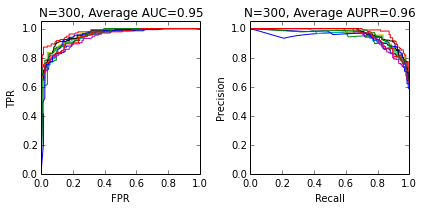

3 : 500------------------------------------


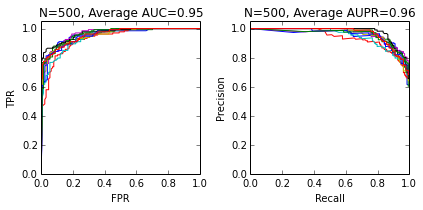

3 : 800------------------------------------


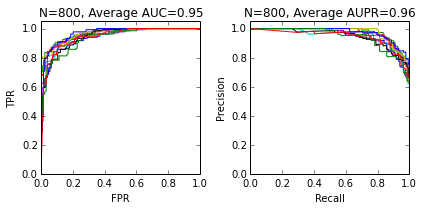

3 : 1200------------------------------------


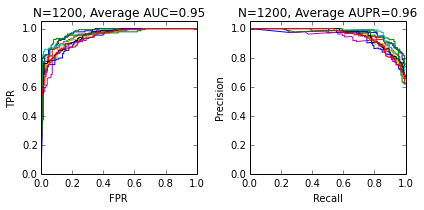

4 : independent
2017-04-24 23:55:16
4 : 120------------------------------------


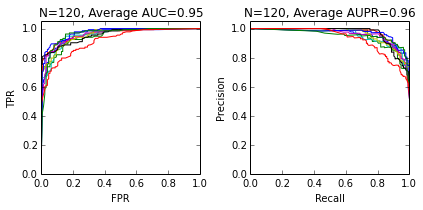

4 : 300------------------------------------


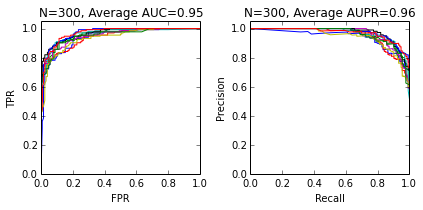

4 : 500------------------------------------


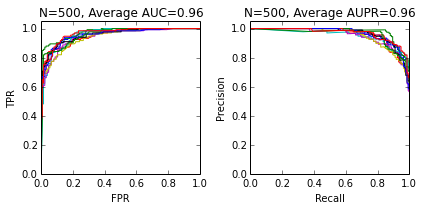

4 : 800------------------------------------


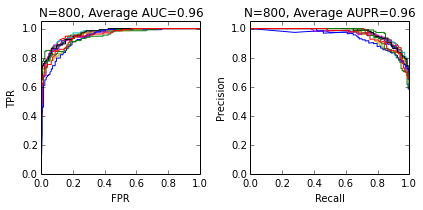

4 : 1200------------------------------------


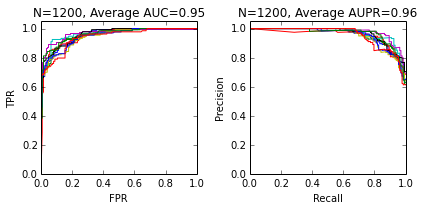

5 : independent
2017-04-24 23:58:35
5 : 120------------------------------------


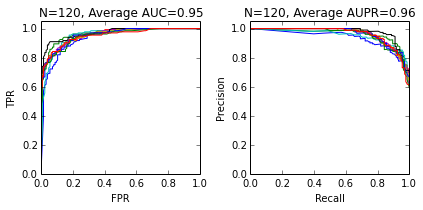

5 : 300------------------------------------


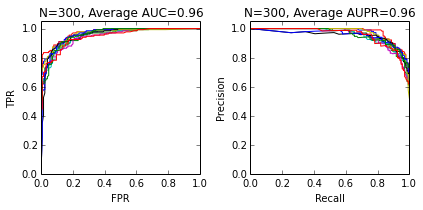

5 : 500------------------------------------


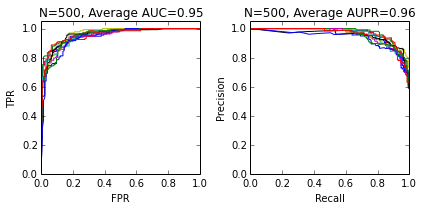

5 : 800------------------------------------


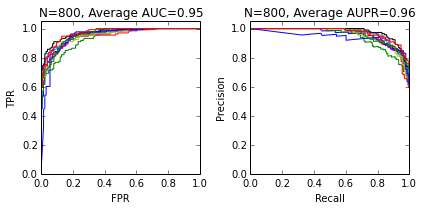

5 : 1200------------------------------------


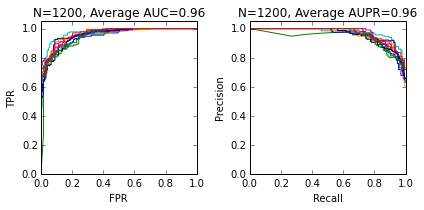

6 : independent
2017-04-25 00:01:54
6 : 120------------------------------------


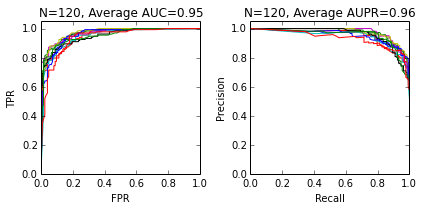

6 : 300------------------------------------


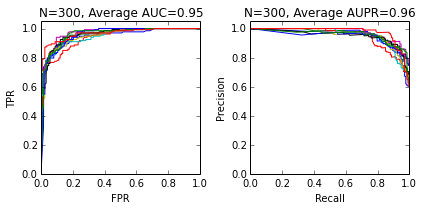

6 : 500------------------------------------


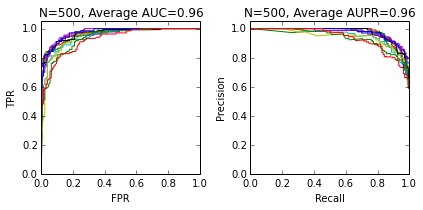

6 : 800------------------------------------


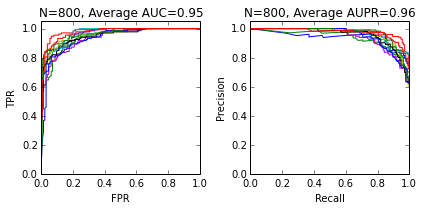

6 : 1200------------------------------------


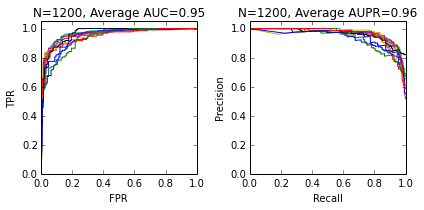

7 : independent
2017-04-25 00:05:15
7 : 120------------------------------------


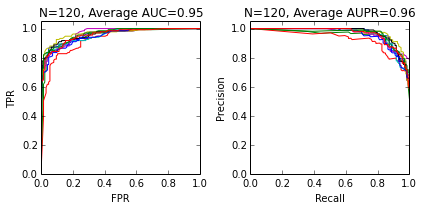

7 : 300------------------------------------


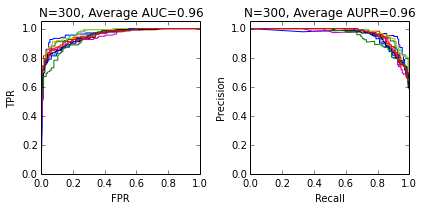

7 : 500------------------------------------


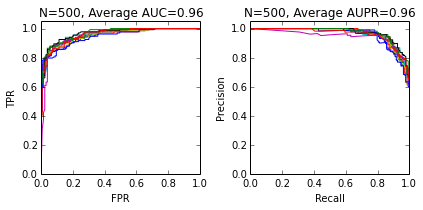

7 : 800------------------------------------


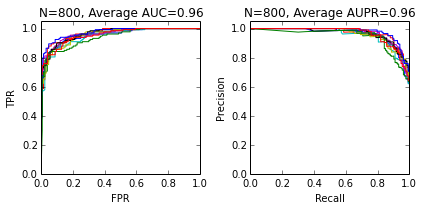

7 : 1200------------------------------------


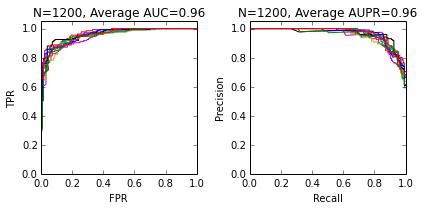

8 : independent
2017-04-25 00:08:37
8 : 120------------------------------------


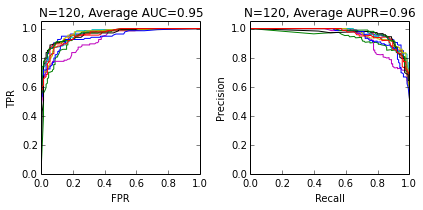

8 : 300------------------------------------


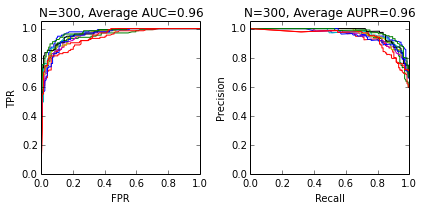

8 : 500------------------------------------


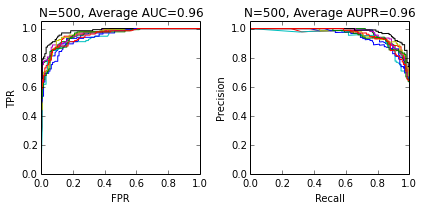

8 : 800------------------------------------


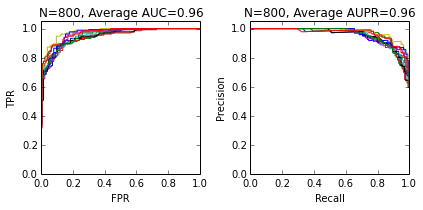

8 : 1200------------------------------------


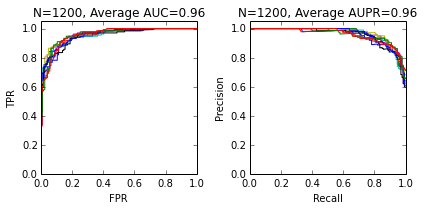

9 : independent
2017-04-25 00:11:57
9 : 120------------------------------------


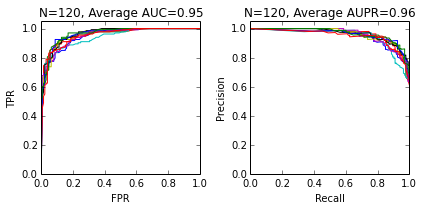

9 : 300------------------------------------


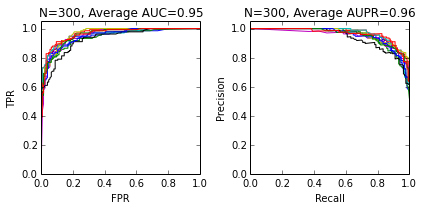

9 : 500------------------------------------


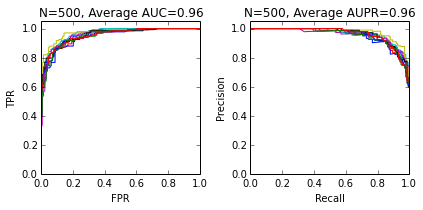

9 : 800------------------------------------


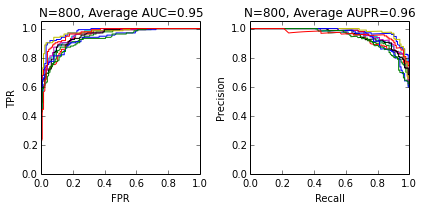

9 : 1200------------------------------------


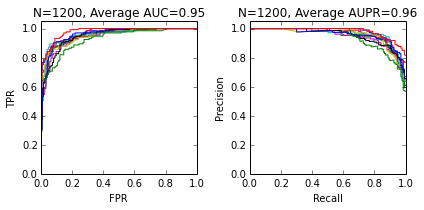

end : 2017-04-25 00:15:19


In [54]:
# 또 덮어씀... try0의 1200이 제일 좋았었음.
# pick random noise by 1:1 (P:TN:Noise = 1:0.5:0.5 --> P:N = 1:2)
indices_05 = list()
#li_noise1 = list()
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_training_05by05.txt", 'w') as fd :   
    
    for i in range(10):
    #for idx, i in zip(indices_2, range(10)):
        fd.write("<{} : independent>\r\n".format(i))
        print "{} : independent\n".format(i) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        idx = random.sample(xrange(0, no_tn_count), tn_neg_count) # no_tn_count의 index에서 tn_count만큼 랜덤 인덱스를 뽑는다.
        indices_05.append(idx)
        filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
        noise_tn = pd.concat([tn,filtered])
        
        x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
        y_whole_data = noise_tn["association"].values
        
        param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        for user_estimator in [120,300,500,800,1200]:
            folds_results, draw_results = Random_Forest_K_fold_graph(x_whole_data, y_whole_data, k, user_estimator)
            avg_result = average_result(folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
            param_results[user_estimator].append(avg_result) # parameter 별로 indepedent 결과 저장한다.
            draw_total[user_estimator].append(draw_results)

        final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
        for user_estimator in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
            indep_results = independent_results(param_results[user_estimator])
            final_param_results[user_estimator] = final_results(indep_results)
            draw_plot(draw_total[user_estimator], final_param_results[user_estimator], i, user_estimator)
            write_output(fd, final_param_results[user_estimator], i, user_estimator)
print 'end : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-04-25 00:42:01
0 : 1200------------------------------------


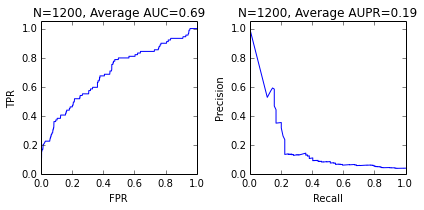

2017-04-25 00:42:09


In [58]:
# pick random noise by 1:1 (P:TN:Noise = 1:0.5:0.5 --> P:N = 1:2)
#indices_2 = list()
#li_noise1 = list()
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_indep_05by05.txt", 'w') as fd :
    user_estimator = 1200
    i= 0
    idx = indices_05[i]
    fd.write("<{} : independent>\r\n".format(i))
    filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
    noise_tn = pd.concat([tn,filtered])

    x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
    y_whole_data = noise_tn["association"].values

    folds_results, draw_results, fp_results = Random_Forest_independent_graph(x_whole_data, y_whole_data, indep_x, indep_y, user_estimator)
    draw_plot([draw_results], folds_results, i, user_estimator)
    write_output(fd, folds_results, i, user_estimator)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-04-25 00:50:44
318
0 : 1200------------------------------------


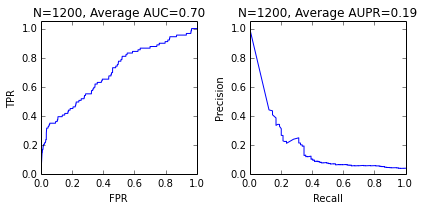

2017-04-25 00:50:52


In [64]:
# pick random noise by 1:1 (P:TN:Noise = 1:0.8:0.2 --> P:N = 1:2)
#indices_2 = list()
#li_noise1 = list()
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_indep_08by02.txt", 'w') as fd :
    user_estimator = 1200
    
    fd.write("<{} : independent>\r\n".format(i))
    idx = random.sample(xrange(0, no_tn_count), 1330 - tn_neg_count) # no_tn_count의 index에서 랜덤 인덱스를 뽑는다.
    print len(idx)

    filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
    noise_tn = pd.concat([tn,filtered])

    x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
    y_whole_data = noise_tn["association"].values

    folds_results, draw_results, fp_results = Random_Forest_independent_graph(x_whole_data, y_whole_data, indep_x, indep_y, user_estimator)
    draw_plot([draw_results], folds_results, i, user_estimator)
    write_output(fd, folds_results, i, user_estimator)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-04-25 01:02:04
1350
0 : 1200------------------------------------


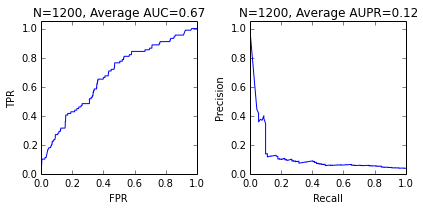

2017-04-25 01:02:12


In [74]:
# pick random noise by 1:1 (P:TN:Noise = 1:0.8:0.2 --> P:N = 1:2)
#indices_2 = list()
#li_noise1 = list()
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/5_final/'
with open(path + "4_3_RF(sim)_tn+noise_indep_test2.txt", 'w') as fd :
    user_estimator = 1200
    
    fd.write("<{} : independent>\r\n".format(i))
    idx = random.sample(xrange(0, no_tn_count), 1350) # no_tn_count의 index에서 랜덤 인덱스를 뽑는다.
    print len(idx)

    filtered = no_tn.filter(items = idx, axis=0) # 뽑은 index만큼 filter
    noise_tn = pd.concat([tn,filtered])

    x_whole_data = noise_tn[noise_tn.columns.values[3:].tolist()].values
    y_whole_data = noise_tn["association"].values

    folds_results, draw_results, fp_results = Random_Forest_independent_graph(x_whole_data, y_whole_data, indep_x, indep_y, user_estimator)
    draw_plot([draw_results], folds_results, i, user_estimator)
    write_output(fd, folds_results, i, user_estimator)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [67]:
tn_neg_count

1012

In [21]:
def final_results (indep_results):
    results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[],
               'sn':[], 'sp':[], 'precision':[], 'recall':[]}
    results['acc'] = sum(indep_results['indep_acc']) / len(indep_results['indep_acc'])
    results['auc'] = sum(indep_results['indep_auc']) / len(indep_results['indep_auc'])
    results['aupr'] = sum(indep_results['indep_aupr']) / len(indep_results['indep_aupr'])
    results['sn'] = sum(indep_results['indep_sn']) / len(indep_results['indep_sn'])
    results['sp'] = sum(indep_results['indep_sp']) / len(indep_results['indep_sp'])
    results['precision'] = sum(indep_results['indep_precision']) / len(indep_results['indep_precision'])
    results['recall'] = sum(indep_results['indep_recall']) / len(indep_results['indep_recall'])
    results['confusion_matrix'] = sum(indep_results['indep_confusion_matrix'])
    return results

In [22]:
def independent_results(param_result):
    indep_results = {'indep_acc':[], 'indep_auc':[], 'indep_aupr':[], 'indep_confusion_matrix':[],
                     'indep_sn':[], 'indep_sp':[], 'indep_precision':[], 'indep_recall':[]}
    for fold in param_result:
        indep_results['indep_acc'].append(fold['avg_acc'])
        indep_results['indep_auc'].append(fold['avg_auc'])
        indep_results['indep_aupr'].append(fold['avg_aupr'])
        indep_results['indep_sn'].append(fold['avg_sn'])
        indep_results['indep_sp'].append(fold['avg_sp'])
        indep_results['indep_precision'].append(fold['avg_precision'])
        indep_results['indep_recall'].append(fold['avg_recall'])
        indep_results['indep_confusion_matrix'].append(fold['sum_confusion_matrix'])
    return indep_results

In [23]:
def average_result(folds_results):
    avg_result = dict()
    avg_result['avg_acc'] = sum(folds_results['acc']) / len(folds_results['acc'])
    avg_result['avg_auc'] = sum(folds_results['auc']) / len(folds_results['auc'])
    avg_result['avg_aupr'] = sum(folds_results['aupr']) / len(folds_results['aupr'])
    avg_result['avg_sn'] = sum(folds_results['sn']) / len(folds_results['sn'])
    avg_result['avg_sp'] = sum(folds_results['sp']) / len(folds_results['sp'])
    avg_result['avg_precision'] = sum(folds_results['precision']) / len(folds_results['precision'])
    avg_result['avg_recall'] = sum(folds_results['recall']) / len(folds_results['recall'])
    avg_result['sum_confusion_matrix'] = sum(folds_results['confusion_matrix'])
    
    return avg_result

In [20]:
def Random_Forest_K_fold_graph(X, y, k, user_estimator):
    
    skf = StratifiedKFold(n_splits=k, shuffle=True) # n_splits = k (k fold라서.), pos:neg의 비율을 고려해서 k 개의 subgroup으로 나누어줌.
    folds_results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[], 'sn':[], 'sp':[], 'precision':[], 'recall':[]}
    draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}
    for training_index, validation_index in skf.split(X, y):
        x_training_set = X[training_index]
        y_training_set = y[training_index]
        x_validation_set = X[validation_index]
        y_validation_set = y[validation_index]
        
        classifier = RandomForestClassifier(n_estimators=user_estimator, n_jobs=-1, class_weight='balanced') #n_jobs=-1 이면 모든 node 쓰는것, 신경쓰이면 30개 정도.
        classifier.fit(x_training_set, y_training_set)
        
        y_predicted_proba = classifier.predict_proba(x_validation_set) # [0에 대한 확률, 1에 대한 확률], shpae = [n_samples, n_class]
        y_predicted_label = classifier.predict(x_validation_set) # 예측된 label을 보여줌, shpae = [n_samples]
        
        # Accuracy 
        current_acc = classifier.score(x_validation_set, y_validation_set)
        folds_results['acc'].append(current_acc)

        # AUC
        current_auc = roc_auc_score(y_validation_set, y_predicted_proba[:,1])
        folds_results['auc'].append(current_auc)
        
        # Sensitivity, Specificity
        sn, sp, support = sensitivity_specificity_support(y_validation_set, y_predicted_label)
        folds_results['sn'].append(sn)
        folds_results['sp'].append(sp)
        
        # AUPR
        current_aupr = average_precision_score(y_validation_set, y_predicted_proba[:,1])
        folds_results['aupr'].append(current_aupr)
        
        # Precision, Recall
        precision, recall, _, _ =  precision_recall_fscore_support(y_validation_set, y_predicted_label, average = 'binary')
        folds_results['precision'].append(precision)
        folds_results['recall'].append(recall)
        
        # Confusion Matrix
        current_confusion_matrix = confusion_matrix(y_validation_set,y_predicted_label)
        folds_results['confusion_matrix'].append(current_confusion_matrix)
        
        #draw graph
        fpr, tpr, thresholds = roc_curve(y_validation_set, y_predicted_proba[:, 1], pos_label=1)
        draw_results['fpr'].append(fpr)
        draw_results['tpr'].append(tpr)
        
        precision_vec, recall_vec, _ = precision_recall_curve(y_validation_set, y_predicted_proba[:, 1])
        draw_results['precision_vec'].append(precision_vec)
        draw_results['recall_vec'].append(recall_vec)
        
    return folds_results, draw_results

In [7]:
def Random_Forest_independent_graph(X, y, indep_X, indep_y, user_estimator):

    folds_results = dict()
    draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}
    fp_results = dict()
    
    classifier = RandomForestClassifier(n_estimators=user_estimator, n_jobs=-1, class_weight='balanced')
    classifier.fit(X, y)
    indep_y_predicted_proba = classifier.predict_proba(indep_X)
    indep_y_predicted_label = classifier.predict(indep_X)
    fp_results['predicted_proba'] = indep_y_predicted_proba
    fp_results['Predicted_label'] = indep_y_predicted_label
    fp_results['y_true'] = indep_y

    # Accuracy
    indep_acc = classifier.score(indep_X, indep_y)
    folds_results['acc']=indep_acc
    
    # AUC
    indep_auc = roc_auc_score(indep_y, indep_y_predicted_proba[:,1])
    folds_results['auc']=indep_auc
    
    # Sensitivity, Specificity
    indep_sn, indep_sp, support = sensitivity_specificity_support(indep_y, indep_y_predicted_label)
    folds_results['sn']=indep_sn
    folds_results['sp']=indep_sp
    
    # AUPR
    indep_aupr = average_precision_score(indep_y, indep_y_predicted_proba[:,1])
    folds_results['aupr']=indep_aupr
    
    # Precision, Recall
    indep_precision, indep_recall, _, _ = precision_recall_fscore_support(indep_y, indep_y_predicted_label, average = 'binary')
    folds_results['precision']=indep_precision
    folds_results['recall']=indep_recall
    
    # Confusion Matirx
    indep_confusion_matirx = confusion_matrix(indep_y, indep_y_predicted_label)
    folds_results['confusion_matrix']=indep_confusion_matirx
    
    # draw graph
    indep_fpr, indep_tpr, thresholds = roc_curve(indep_y, indep_y_predicted_proba[:, 1], pos_label=1)
    draw_results['fpr'].append(indep_fpr)
    draw_results['tpr'].append(indep_tpr)
        
    indep_precision_vec, indep_recall_vec, _ = precision_recall_curve(indep_y, indep_y_predicted_proba[:, 1])
    draw_results['precision_vec'].append(indep_precision_vec)
    draw_results['recall_vec'].append(indep_recall_vec)

    return folds_results, draw_results, fp_results
def draw_plot(draw_results, final_result, i, user_estimator):
    #colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna'])
    colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna']
    lw = 1
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    print "{} : {}------------------------------------".format(i, user_estimator)
    for i in draw_results:
        for fpr, tpr in zip(i['fpr'], i['tpr']):
            ax1.plot(fpr, tpr, lw=lw)
        for recall_vec, precision_vec in zip(i['recall_vec'], i['precision_vec']):
            ax2.plot(recall_vec, precision_vec, lw=lw)
    ax1.set_xlabel('FPR')
    ax1.set_ylabel('TPR')
    ax1.set_color_cycle(colors)
    ax1.set_title('N={0}, Average AUC={1:0.2f}'.format(user_estimator, final_result['auc']))
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlim([0.0, 1.0])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_color_cycle(colors)
    ax2.set_title('N={0}, Average AUPR={1:0.2f}'.format(user_estimator, final_result['aupr']))
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlim([0.0, 1.0])
    plt.tight_layout()
    plt.show()
def write_output(fd, write_results, i, user_estimator):
    fd.write("try={}, N={}-------------------------------------------------\r\n".format(i, user_estimator))
    fd.write("Accuracy avg : {}\r\n".format(write_results['acc']))
    fd.write("AUC avg : {}\r\n".format(write_results['auc']))
    fd.write("  Sensitivity avg : {}\r\n".format(write_results['sn']))
    fd.write("  Specificity avg : {}\r\n".format(write_results['sp']))
    fd.write("AUPR avg : {}\r\n".format(write_results['aupr']))
    fd.write("  Precision avg : {}\r\n".format(write_results['precision']))
    fd.write("  Recall avg : {}\r\n".format(write_results['recall']))
    fd.write("confusion amtrix : {}\r\n".format(write_results['confusion_matrix']))